# Lab 11: Statistical Modeling and Linear Regression

In [ ]:
# install.packages('ggplot2')
# install.packages('ggforce')
# install.packages("tidyverse")
# install.packages("ggpmisc")
library(tidyverse)
library(ggplot2)
library(ggforce)
library(ggpmisc)
set.seed(88)

# Linear Regression

In this section, we dive into the ability to relate variables in a linear fashion with linear regression.

### Simple Linear Regression

"Simple" linear regression simply refers to the case where we have one explanatory variable, and one dependent variable, for which we want to assess the linear relationship between.

Simple linear regression is predicated on the assumption that the **true** relationship between x (our explanatory variable) and y (dependent variable) is

$$y_i = \beta_0 + \beta_1 * x_i + \epsilon_i$$

where



*   $y_i$: the i-th observation of the response variable
*   $\beta_0$: the TRUE intercept value of the underlying linear relationship
*   $\beta_1$: the TRUE slope value of the underlying linear relationship
*   $x_i$: the i-th observation of the explanatory variable
*   $\epsilon_i$: the i-th noise value






The idea behind this model is we assume that the underlying expected relationship between x and y is linear (as we will see more theoretically when we look at the Ordinary Least Squares (OLS) assumptions). For now, it suffices to understand that a linear regression is learning the best fit line that describe the data. In mathematical terms, a linear regression learns the relationship

$$\hat{y} = \hat{\beta_0} + \hat{\beta_1}x$$

A linear regression tries to predict y (which is we use $\hat{y}$ to signify this a prediction and not the truth) with learned regression parameters ($\hat{\beta_0}$, $\hat{\beta_1}$) using the explanatory variable $x$.

For example, using the mtcars dataset, let's see if we can predict how long it takes a car to travel a quarter of a mile from its horsepower. It seems pretty reasonable to assume that the more horsePOWER a car has, the faster it can go right?

In [ ]:
head(mtcars)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1


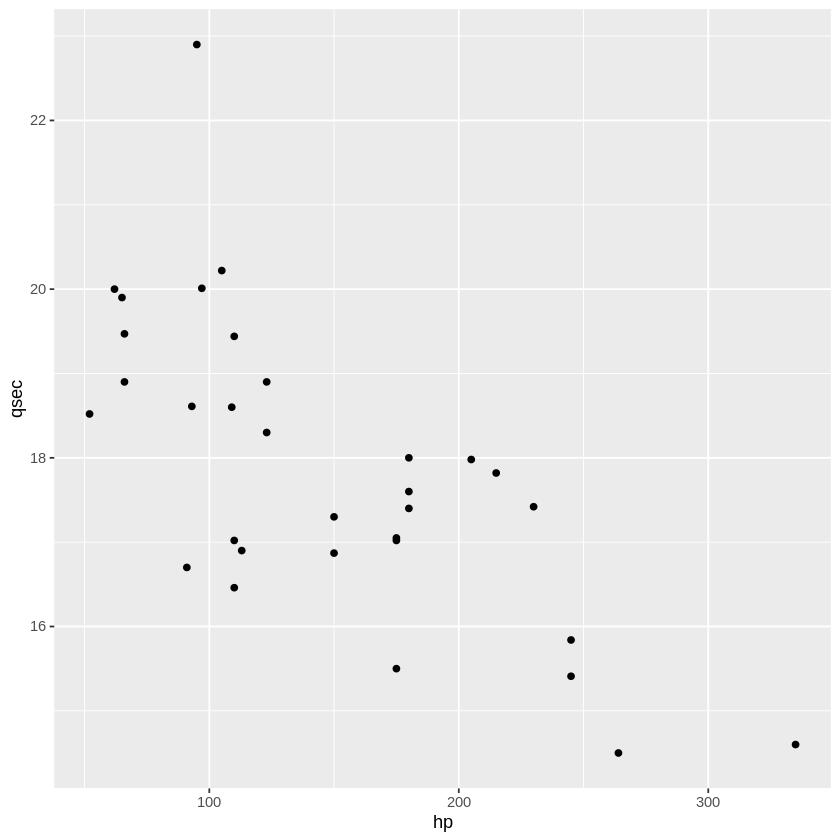

In [ ]:
ggplot(data=mtcars, aes(x=hp, y=qsec)) + geom_point()

Our hunch is correct! There seems to be an inverse relationship between horsepower (hp) and the time it takes for a car to traver a quarter mile (qsec).

We can assess the relationship using the `lm` function which is short for "linear model" and access key insights by calling the summary function with our linear model variable as the argument.

In [ ]:
qsec_from_hp <- lm(qsec ~ hp, data=mtcars)

In [ ]:
summary(qsec_from_hp)


Call:
lm(formula = qsec ~ hp, data = mtcars)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.1766 -0.6975  0.0348  0.6520  4.0972 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 20.556354   0.542424  37.897  < 2e-16 ***
hp          -0.018458   0.003359  -5.495 5.77e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.282 on 30 degrees of freedom
Multiple R-squared:  0.5016,	Adjusted R-squared:  0.485 
F-statistic: 30.19 on 1 and 30 DF,  p-value: 5.766e-06


What do these values mean? Linear regression tries to estimate best coefficients for the line, but because error exists, it comes with uncertainty. The "Estimate" provides you with the point estimate for the regression values. This can be in layman's terms interpreted as the value you would choose for the slope and intercept if you could only choose 1 value as your prediction.

However, as statisticians we want to quantify the uncertainty of these estimates and that's what the "Std. Error" gives us. With these 2 quantities, we can calulate a t-score and the associated p-value that comes with it. The lower the p-value, the less likely this result occured by random chance. Because the hypothesis test being assessed is

$$H_0: \beta_1 = 0 \textrm{ vs. } \beta_1 \neq 0 $$

if there's any slight help from x to predict y, the model will say "Oh wow! That was helpful." It also provides you a p-value to provide the statistical signficance of the result.





This seems almost too simple right? A few recognizable lines of code and BOOM. We have our insight. However, unlike previous labs where the challenge was the programming obstacles you had to jump through, here the challenge is more involved with the metrics displayed and how we make inferences from the model.

Is the relationship valid? How do I trust this result? Is this the right model to be running? Linear regression (and really all models) have to deal with these cosmic questions in order to make the inference useful and trustworthy for future predictions. We'll address these questions when we talk about the OLS assumptions.

### Multiple Linear Regression

Multiple linear regression is a linear regression that has several explanatory varibles.

$$ y_i = \beta_0 + \sum_{j=1}^{p} \beta_j * x_{ij} + \epsilon_i$$

The complications that can arise with multiple linear regression that can arise will be discussed in the next segment, but running a multiple linear regression is truly as simple as running the simple case. You identify your response and your predictors and use the same `lm`, `summary` combo you would expect.

Suppose you want to predict the qsec, but instead of only using hp, we also think that the number of cylinders (cyl), the weight (wt), and the number of forward gears (gear) are useful indicators of how quickly a car can move.

In [ ]:
nuanced_qsec_model <- lm(data=mtcars, qsec ~ hp + cyl + wt + gear)

In [ ]:
summary(nuanced_qsec_model)


Call:
lm(formula = qsec ~ hp + cyl + wt + gear, data = mtcars)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.3573 -0.5537 -0.1712  0.4668  2.9252 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 25.092953   2.097136  11.965 2.65e-12 ***
hp          -0.009353   0.005528  -1.692 0.102191    
cyl         -0.915657   0.232959  -3.931 0.000532 ***
wt           1.008693   0.298983   3.374 0.002256 ** 
gear        -0.936104   0.351266  -2.665 0.012836 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.8962 on 27 degrees of freedom
Multiple R-squared:  0.7809,	Adjusted R-squared:  0.7485 
F-statistic: 24.06 on 4 and 27 DF,  p-value: 1.447e-08


Notice how including more variables in our analysis actually changed our conclusion. Horsepower no longer seems to be a super useful predictor of the qsec.

This happens because in the simple linear regression case, the only predictor that the model is allowed to use is the horsepower, and without horsepower, all you have is an intercept which is a horizontal line. So, of course the simple case will spit out that horsepower is useful. However, the multiple regression model provides us with a more nuanced inference. The model basically starts to say "you know, hp is helpful if that's all I have to work with, but having access to cyl, wt, and gear I actually don't need hp anymore and it doesn't help nearly as much."

### OLS Assumptions

While linear regression is incredibly simple to use, it requires more nuance to paint the full picture. There are some fundamental questions we need to ask ourselves when trying to apply linear regression.

Here we will list out the assumptions 1 by 1 and explain why they are fundamental to getting interpretable results from a linear regression model. We'll do so by violating these assumptions and try to destroy linear regression.

<br>

---

1. **The relationship between the X and Y variables must be linear.**

---

<br>


... no duh. But there's actually more to it. Imagine trying to run a linear regression on the following dataframe.

`geom_smooth()` using formula = 'y ~ x'


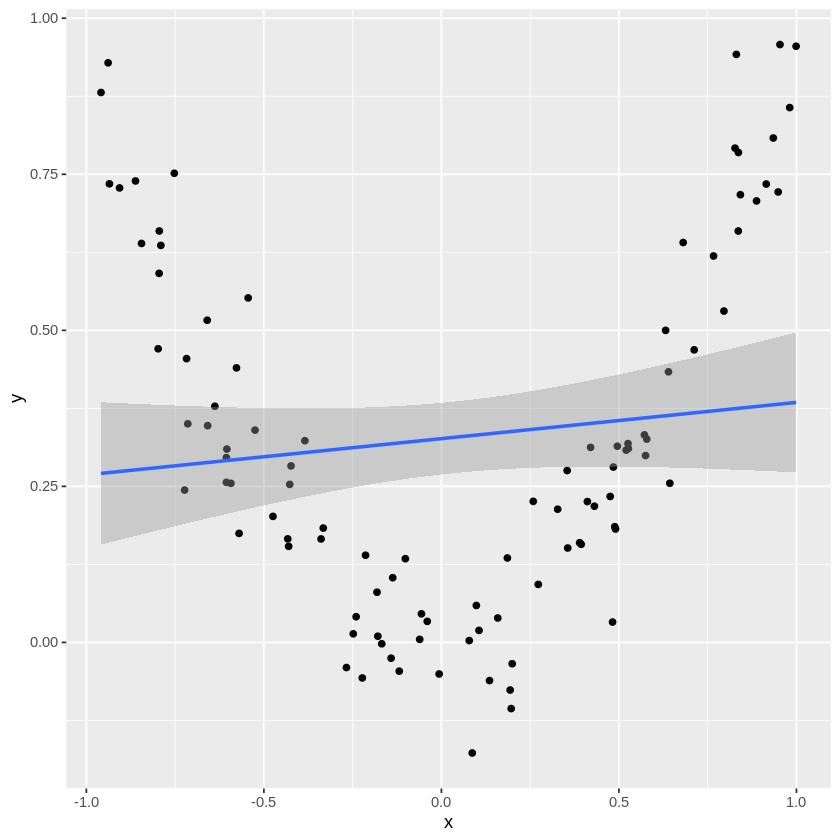

In [ ]:
x=runif(100,-1,1)
y = x^2 + rnorm(100, 0, 0.1)
df <- data.frame(x,y)
ggplot(df,aes(x, y)) +
  geom_point() +
  geom_smooth(method='lm')

This is not a very smart model. Clearly I coded the data generating process to give x and y a quadratic relationship. This model has no predictive structure to it. However...

`geom_smooth()` using formula = 'y ~ x'


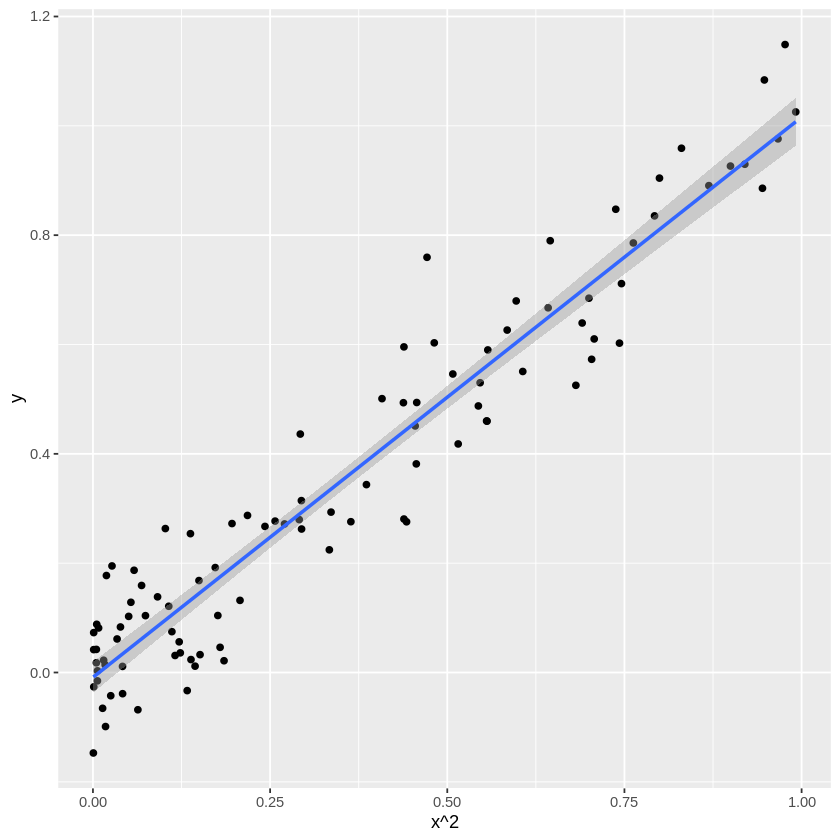

In [ ]:
x=runif(100,-1,1)
y = x^2 + rnorm(100, 0, 0.1)
df <- data.frame(x^2,y) # NOTICE THE DIFFERENCE HERE?
ggplot(df,aes(x^2, y)) +
  geom_point() +
  geom_smooth(method='lm')

When we provide a variable for x that really does have a linear relationship with y, our model actually makes sense of the data quite well.



---


  2. **Observations are randomly sampled.**



---

<br>

Consider what happens if we filter out data points we don't want and don't let points be random.

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


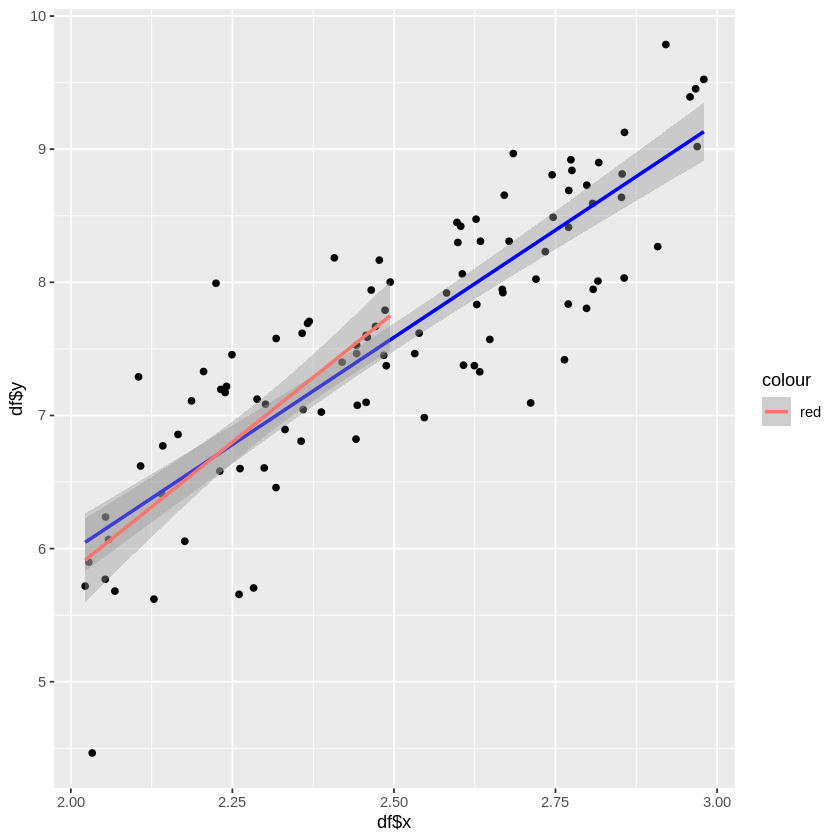

In [ ]:
x <- runif(100, 2, 3)
y <- 3 * x + rnorm(100, 0, 0.5)
df <- data.frame(x,y)
with_filter_df <- df %>% filter(x <= 2.5)
ggplot() +
  geom_point(aes(df$x, df$y)) +
  geom_smooth(aes(df$x, df$y), method='lm', col='blue') +
  geom_smooth(aes(with_filter_df$x, with_filter_df$y, col='red'), method="lm")

Notice that the red line is created from random observations. We did originally sample everything independently, but then only used observations lower than 2.5. This decision to filter isn't done at random and can result in a regression line that isn't representative of your true data. A common malpractice for data analysis is running an analysis based off of a convenience sample (aka analyzing data that's easy or desirable to get).


<br>

---



  3. **The condtional mean of errors is 0: $E(ϵ|x) = 0$.**

---

<br>

This is an incredibly important assumption because it assumes we have all the relevant data available to us.

Let's take the example where you and I are all powerful and we know that

$y = 0.1 * x_1 - 2*x_2 + ϵ$, where $ϵ \sim N(0,10)$.

However, what if we don't have access to $x_2$? So the best we can do is run a linear regression on $x_1$ and $y$. Below is an example where I generate data such that $x_1 \sim N(100, 5)$ and $x_2 \sim N(50, 5)$.





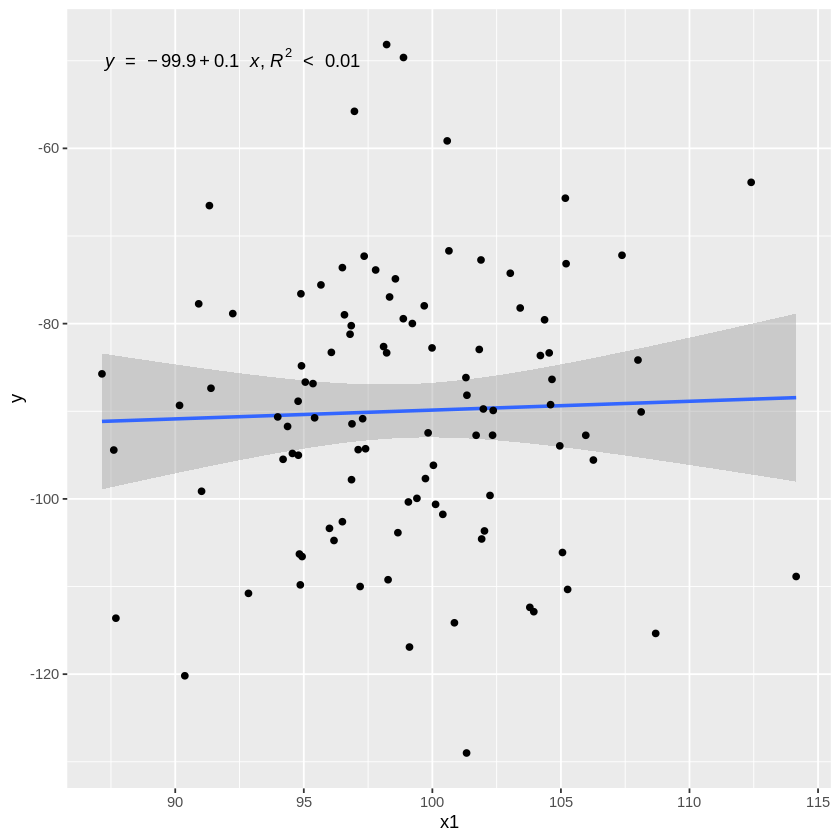

In [ ]:
x1 <- rnorm(100, 100, 5)
x2 <- rnorm(100, 50, 5)
eps <- rnorm(100, 0, 10)
y <- 0.1* x1 - 2 * x2 + eps
df <- data.frame(x1, x2, y)
ggplot(data = df, aes(x = x1, y = y)) +
  stat_poly_line() +
  stat_poly_eq(aes(label = paste(after_stat(eq.label),
                                 after_stat(rr.label), sep = "*\", \"*"))) +
  geom_point()

Holy cow this is abysmal. Despite us knowing that there is a very clear linear structure to the data, our coefficient for $x_1$ is not really accurate and the plot seems to indicate the data is all over the place. Rerunning this code over and over again will create different results every time and this analysis is flawed overall. Our error term contains relevant information which isn't random! This is called **omitted variable bias**.

  

---


  
  4. **There is no multicollinearity.**



---
<br>

This assumption helps us ensure that the interpretation of the model is accurate. When we interpret the results of the regression, we can interpret every slope coefficient as the change in the response given a unit increase in the explanatory variable holding everything else constant.

So for example, revisiting the mtcars example,


In [ ]:
nuanced_qsec_model <- lm(data=mtcars, qsec ~ hp + cyl + wt + gear)
summary(nuanced_qsec_model)


Call:
lm(formula = qsec ~ hp + cyl + wt + gear, data = mtcars)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.3573 -0.5537 -0.1712  0.4668  2.9252 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 25.092953   2.097136  11.965 2.65e-12 ***
hp          -0.009353   0.005528  -1.692 0.102191    
cyl         -0.915657   0.232959  -3.931 0.000532 ***
wt           1.008693   0.298983   3.374 0.002256 ** 
gear        -0.936104   0.351266  -2.665 0.012836 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.8962 on 27 degrees of freedom
Multiple R-squared:  0.7809,	Adjusted R-squared:  0.7485 
F-statistic: 24.06 on 4 and 27 DF,  p-value: 1.447e-08


we can interpret this model as saying that increasing the number of cylinders by 1 decreases the qsec time by aprroximately -0.916 seconds when holding the weight, number of gears, and horsepower constant. In this case it's reasonable we could construct a car like this. But take the following example.

Suppose that in this imaginary world, we have the following weather phenomenon during the month of January.


> Temperature (F): $T \sim Unif(-10,40)$<br>
> Snowfall (in): $S \sim N(\frac{40-T}{5}, 0.05)$<br>
> Accidents: $A \sim N(S, 1)$


In [ ]:
temp = runif(100, -10, 40)
accidents_df <- data.frame(temp)
accidents_df <- accidents_df %>%
  mutate(snowfall=rnorm(100, (40-temp)/5, 0.05)) %>%
  mutate(accidents=rnorm(100, snowfall, 1))

In [ ]:
head(accidents_df)

,temp,snowfall,accidents
,<dbl>,<dbl>,<dbl>
1,12.148481,5.529864,5.737397
2,28.642191,2.330119,3.154332
3,31.046126,1.757245,1.038744
4,-5.437036,9.009023,9.075620
5,30.295503,1.887756,3.529886
6,-1.988298,8.375794,8.440630


So in this imaginary world, the number of accidents is a normal distribution that's around the number of inches of snow we get. The amount of snow we get depends on how cold it is. However, clearly temperature and snowfall are correlated! The colder it gets, the more snow we're likely to have!

In [ ]:
colinear_model <- lm(data=accidents_df, accidents ~ snowfall + temp)
summary(colinear_model)


Call:
lm(formula = accidents ~ snowfall + temp, data = accidents_df)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.98155 -0.51368  0.03155  0.50538  2.02579 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept)  -5.5195    14.0151  -0.394    0.695
snowfall      1.6648     1.7525   0.950    0.345
temp          0.1452     0.3511   0.414    0.680

Residual standard error: 0.8744 on 97 degrees of freedom
Multiple R-squared:  0.9133,	Adjusted R-squared:  0.9115 
F-statistic: 510.9 on 2 and 97 DF,  p-value: < 2.2e-16


Notice that our interpretation starts to become difficult to interpret. The slope for temp seems to imply that change happens while keeping the amount of snowfall constant. But is that reasonable to assume that it's possible? A temperature increase should lead to a decrease in snowfall. This is the problem of correlated features. I encourage you to try and run the above regression model multiple times to see why this is problematic. What do you notice?



---

  5. **Errors are homoscedastic: $Var(ϵ|x) = \sigma^2$.**


---



This assumption assumes that all data points have the same variance in their errors. Without this assumption, certain points could get the ability to influence the model more than others. Consider the following situation.

`geom_smooth()` using formula = 'y ~ x'


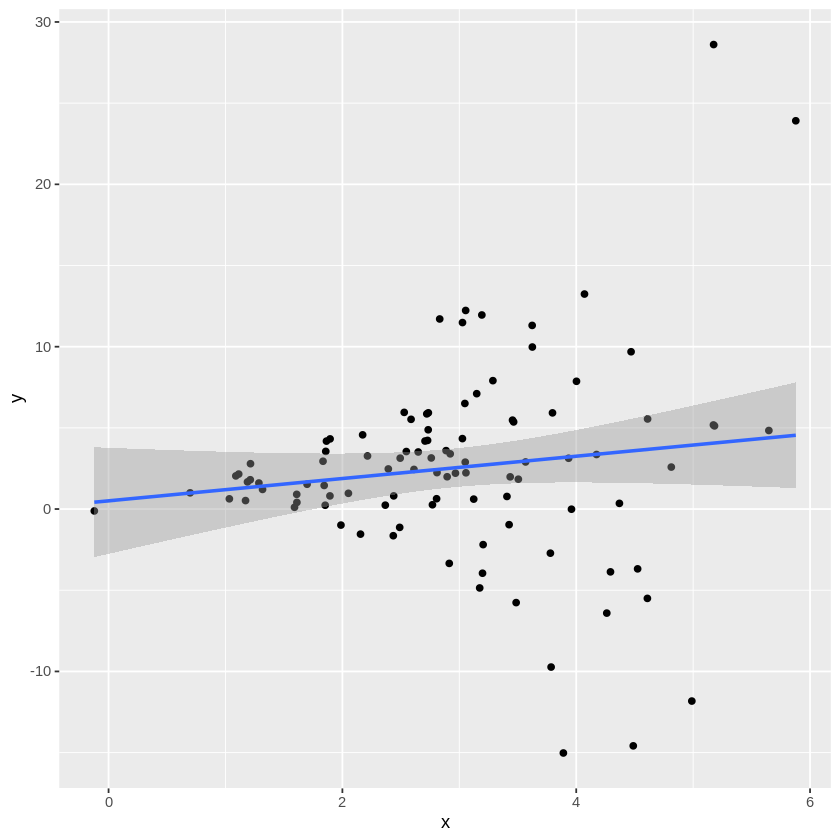

In [ ]:
x <- rnorm(100, 3, 1)
y <- x + rnorm(100, 0, x^2/2)
df <- data.frame(x, y)
ggplot(data=df, aes(x,y)) +
  geom_point() +
  geom_smooth(method="lm")

You and I can see that I generated this model with an underlying linear relationship, but clearly the further away we get from 0, the wider our errors become. These wide errors add a LOT to our total error and influence the final shape of the line a lot. We want all of our points to be equally influential so that the model summarizes the data and not the other way around.

# OLS Assumptions: A Summary

In short, the 5 OLS assumptions are:

1. Linearity in Parameters
2. Observation are Random
3. $E(\epsilon|x) = 0$
4. No Collinearity
5. $Var(\epsilon|x) = \sigma^2)$

With these assumptions met, we can be rest assured that our model will perform decently for predictive inferences. Even if they aren't perfectly met, the closer we can get to following these assumptions, the better linear regression will perform.

### Correlation

One way to assess if 2 variables are correlated is via the correlation coefficient. The correlation coefficient formula is defined as follows:

$$ r_{xy} = \frac{\sum_{i}(x_i-\bar{x})(y_i-\bar{y})}{\sigma_x \sigma_y} $$

A theoretical result that we will leave as a reading exercise is [that the multiple R^2 coefficient in regression analysis is actually the square of the correlation coefficient](https://www.youtube.com/watch?v=_pw6SDHOvkA). For now, suffice it to say that we can calculate the correlation coefficient using the `cor` function or by taking the square root of the multiple $R^2$ coefficient of a linear regression but getting the sign of the value from the simple linear regression coefficient.

This is important because if the $R^2$ value is 0.25, both r=0.5 and r=-0.5 would yield the same $R^2$ value.

In [ ]:
cor(mtcars$hp, mtcars$qsec)

[1] -0.7082234

In [ ]:
r2 <- summary(qsec_from_hp)$r.squared
# remove names
names(qsec_from_hp$coefficients) <- NULL
coefficient <- qsec_from_hp$coefficients[2]
sqrt(r2) * sign(coefficient)

[1] -0.7082234